<a href="https://colab.research.google.com/github/yanliu1111/DGT170_AI_Essentials_course_resources/blob/main/House_Price_Prediction_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Insight:

- LotArea: The size of the property lot, usually measured in square feet.
- GrLivArea: The above-ground living area size of the house in square feet.
- LotType: The classification of the lot (e.g., corner, cul-de-sac, inside) which may capture desirability or location features.
- BldgType: The type of building (e.g., 1Farm Twnhs Duplex 2fmCon TwnhsE) indicating the structure type.
- HouseStyle: The style or design of the house (e.g., 1Story, 2Story) describing its layout.
- OverallQuality: A numerical rating of the overall quality of the house’s construction and materials.
- OverallCondition: A numerical rating reflecting the general condition or upkeep of the house.
- YearBuilt: The year the house was originally constructed.
- Years: 2025 - YearBuilt (instead of data type column YearBuilt)
- Foundation: The type of foundation used in constructing the house.
- TotalBsmtSF: Total basement area in square feet.
- CentralAir: Indicates whether the house has central air conditioning (typically "Y" for yes or "N" for no).
- FullBath: The number of full bathrooms in the house.
- HalfBath: The number of half bathrooms in the house.
- GarageCars: The capacity of the garage measured by the number of cars it can accommodate.
- GarageArea: Total area of the garage in square feet.
- YearSold: The year when the property was sold.
- SaleType: The type of sale (e.g., conventional, warranty deed) which might include variations in financing or sales conditions.
- SaleCondition: The condition under which the sale occurred (e.g., normal, abnormal) which may capture specifics like distress sales.
- SalePrice: The final selling price of the house which is the target variable for prediction.

## 1. Data Preprocessing


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [65]:
df = pd.read_csv('dataset2.csv')
df.head()

,LotArea,GrLivArea,LotType,BldgType,HouseStyle,OverallQuality,OverallCondition,YearBuilt,Years,Foundation,TotalBsmtSF,CentralAir,FullBath,HalfBath,GarageCars,GarageArea,YearSold,SaleType,SaleCondition,SalePrice
0,8910,1194,Corner,1Fam,1Fam,6,6,1959,66,CBlock,655,Y,1,0,2,539.0,2006,WD,Normal,159500
1,1526,630,Inside,Twnhs,SFoyer,4,8,1970,55,CBlock,630,Y,1,0,1,286.0,2009,WD,Normal,86000
2,14598,1933,CulDSac,1Fam,2Story,6,5,2007,18,PConc,894,Y,2,1,3,668.0,2008,WD,Normal,214000
3,7200,1040,Inside,Duplex,1Story,4,5,1949,76,Slab,0,N,2,0,2,420.0,2009,WD,Normal,90000
4,5687,1716,Inside,2fmCon,2Story,5,6,1912,113,PConc,780,N,2,0,0,0.0,2008,WD,Normal,135900


In [66]:
# Examine data types and missing values
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LotArea           1460 non-null   int64  
 1   GrLivArea         1460 non-null   int64  
 2   LotType           1460 non-null   object 
 3   BldgType          1460 non-null   object 
 4   HouseStyle        1460 non-null   object 
 5   OverallQuality    1460 non-null   int64  
 6   OverallCondition  1460 non-null   int64  
 7   YearBuilt         1460 non-null   int64  
 8   Years             1460 non-null   int64  
 9   Foundation        1460 non-null   object 
 10  TotalBsmtSF       1460 non-null   int64  
 11  CentralAir        1460 non-null   object 
 12  FullBath          1460 non-null   int64  
 13  HalfBath          1460 non-null   int64  
 14  GarageCars        1460 non-null   int64  
 15  GarageArea        1417 non-null   float64
 16  YearSold          1460 non-null   int64  


In [71]:
# Fill NA value in GarageArea
# Ensure GarageArea and GarageCars are numeric
df['GarageArea'] = pd.to_numeric(df['GarageArea'], errors='coerce')
df['GarageCars'] = pd.to_numeric(df['GarageCars'], errors='coerce')

# Calculate average area per car for rows with valid GarageArea and GarageCars > 0
valid = df[(df['GarageArea'].notnull()) & (df['GarageCars'] > 0)].copy()
valid['area_per_car'] = valid['GarageArea'] / valid['GarageCars']
avg_per_car = valid.groupby('GarageCars')['area_per_car'].mean()

# Function to fill missing GarageArea values
def fill_garage_area(row):
    if pd.isnull(row['GarageArea']) and row['GarageCars'] > 0:
        return avg_per_car.loc[row['GarageCars']] * row['GarageCars']
    return row['GarageArea']

# Apply the function to fill NA values
df['GarageArea'] = df.apply(fill_garage_area, axis=1)
df.to_csv("dataset2_cleaned.csv", index=False)
print("GarageArea missing values filled based on average per GarageCars.")

GarageArea missing values filled based on average per GarageCars.


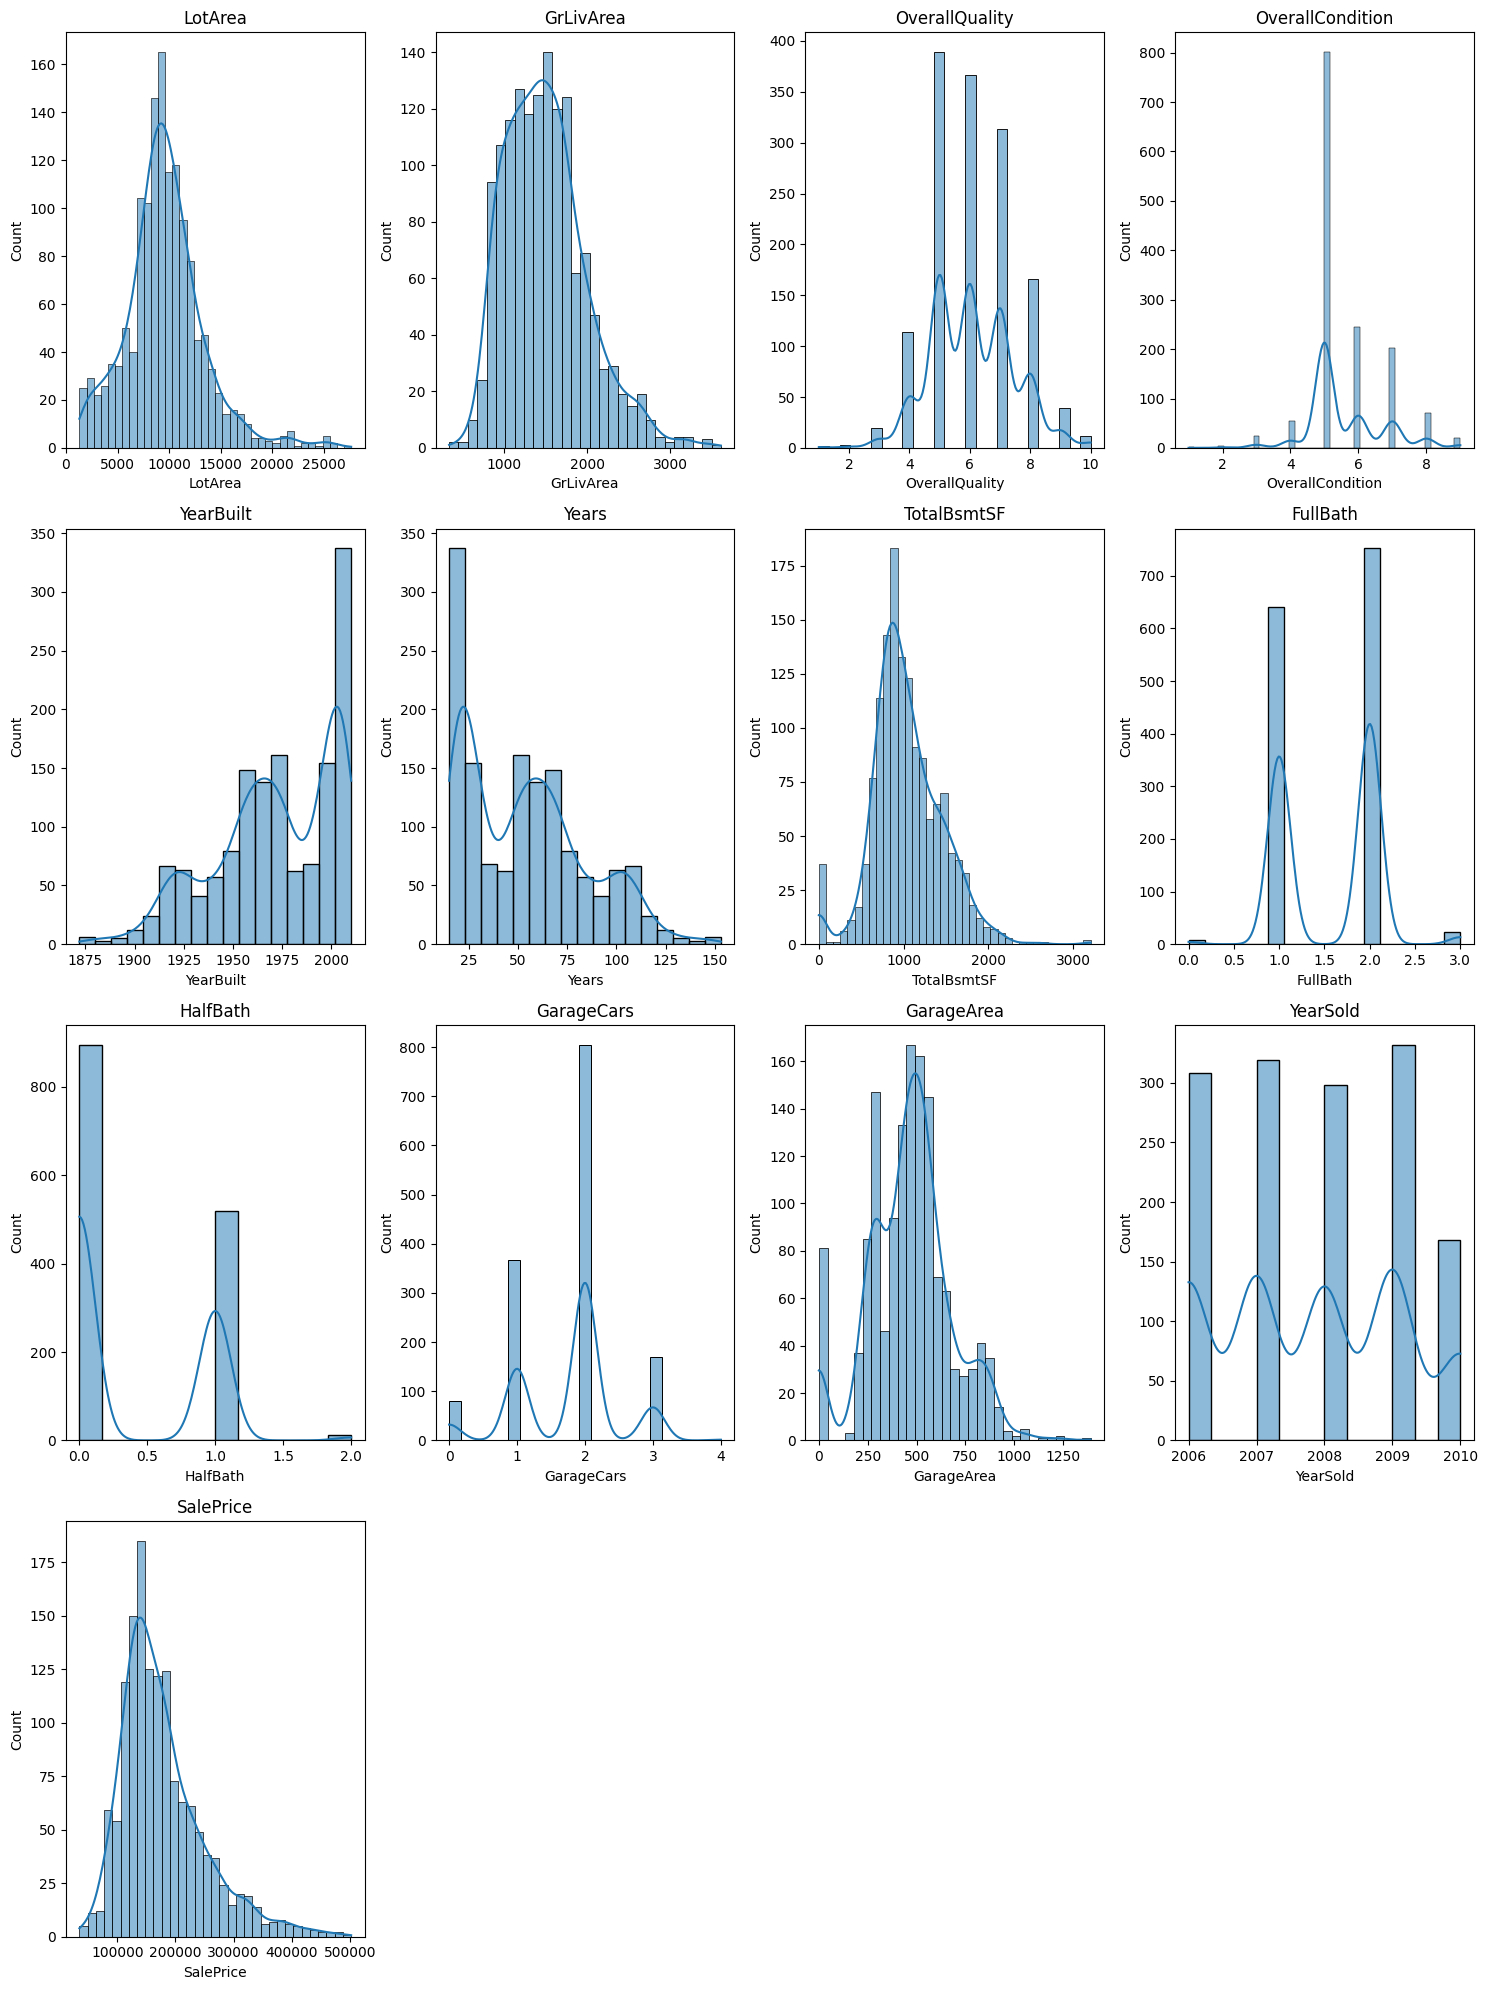

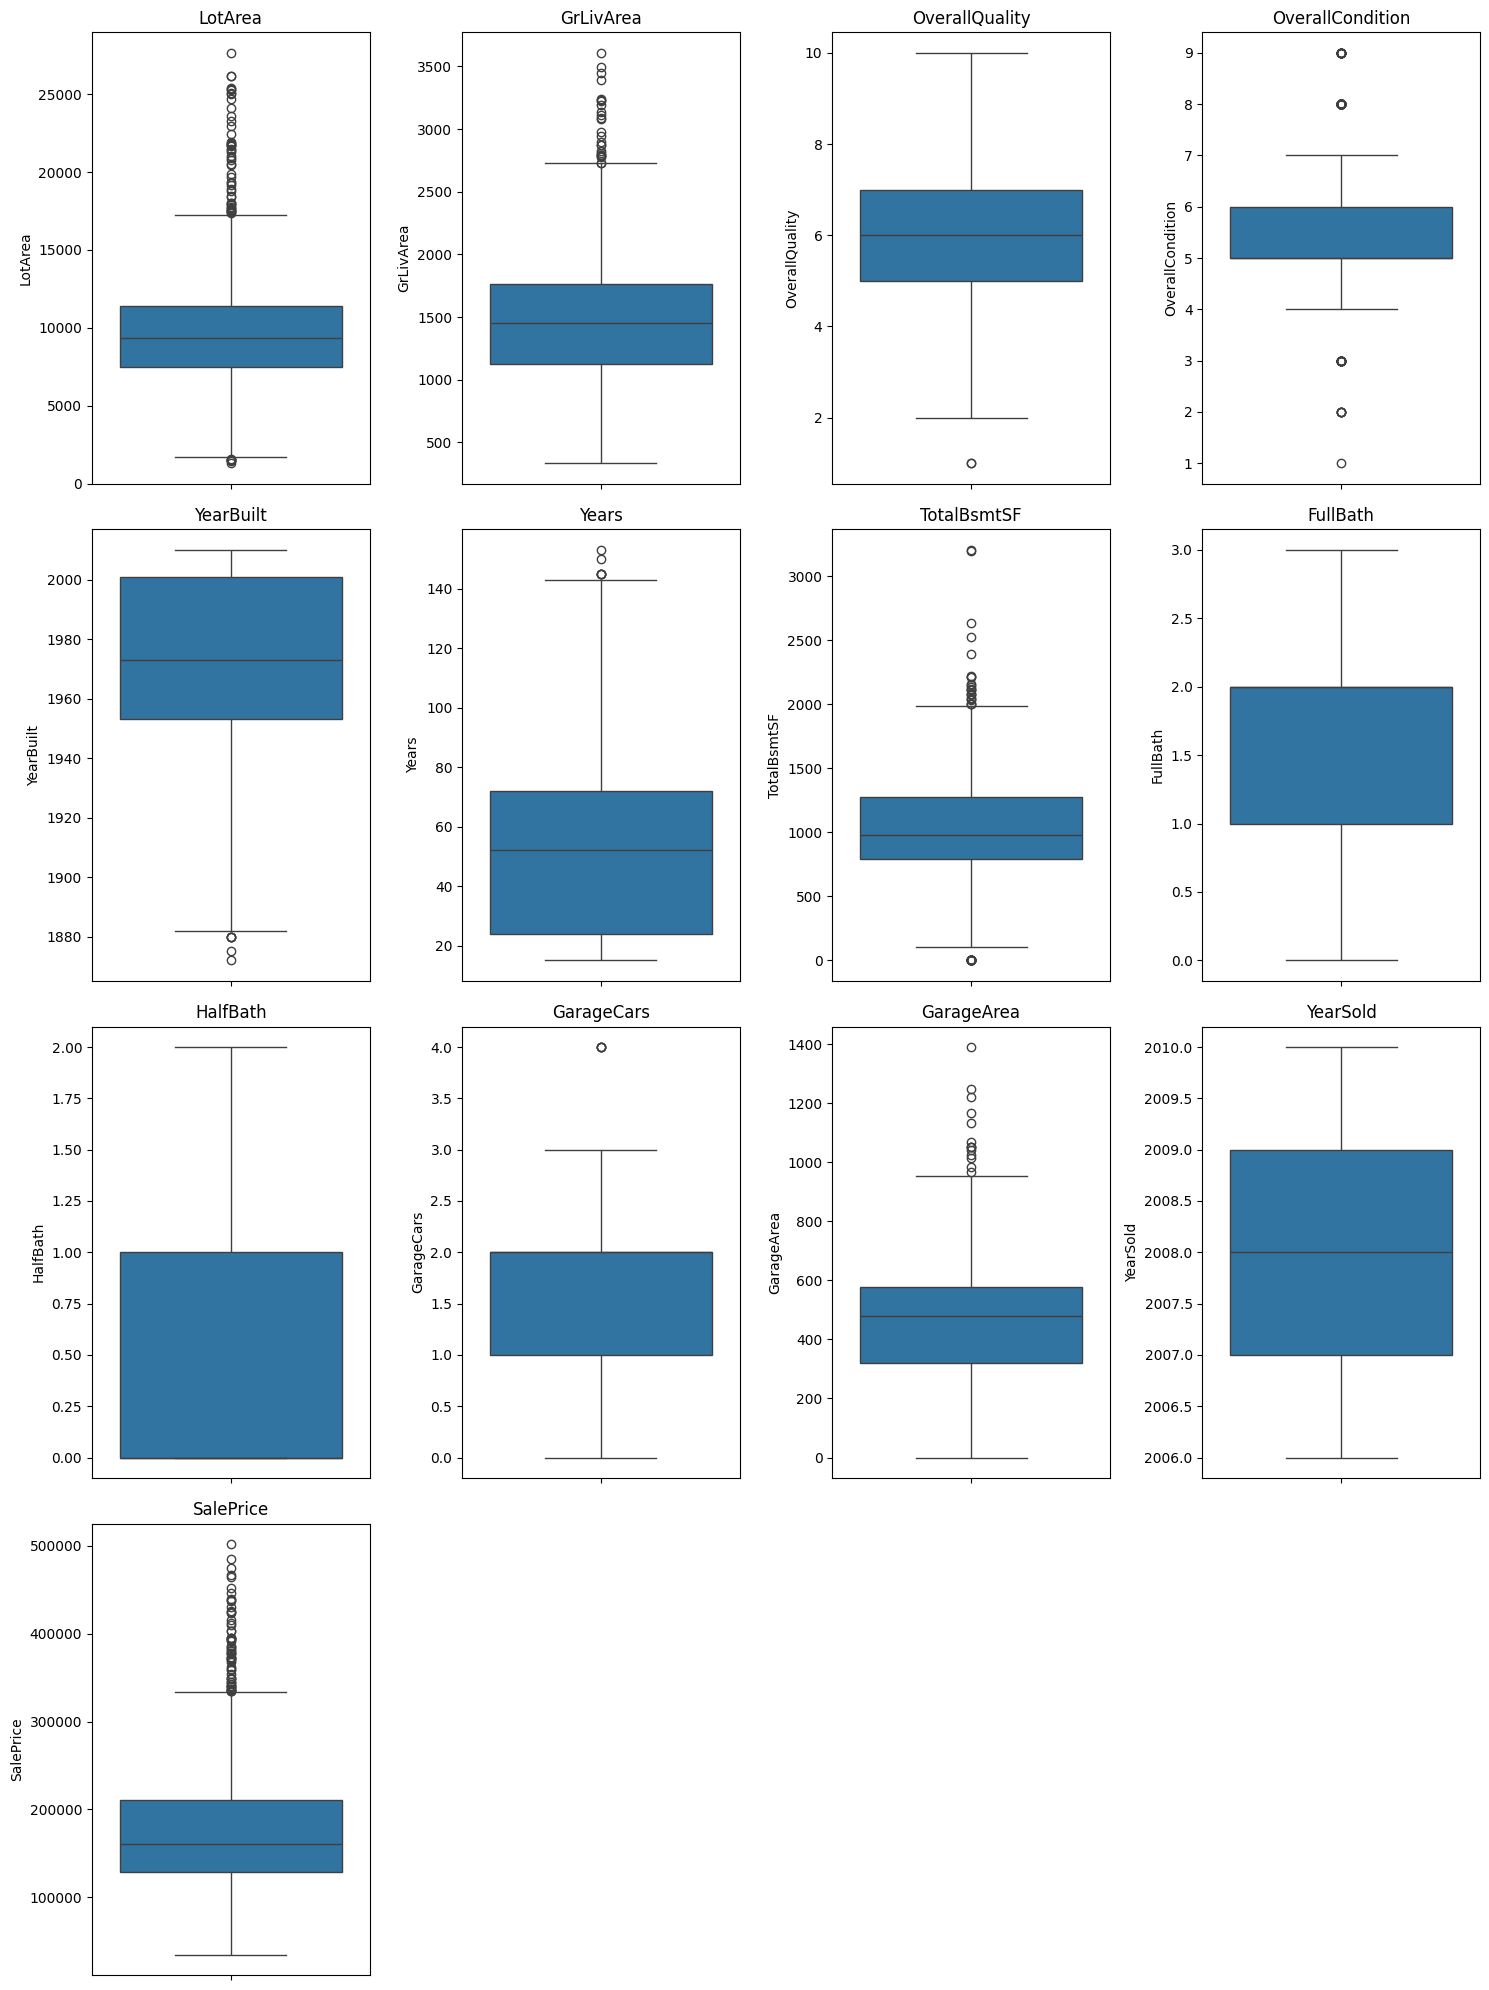

In [70]:
# General review the all columns for clean outlier value
# 1. Histograms for numerical features
num_cols = len(df.select_dtypes(include=['int64', 'float64']).columns)
num_rows = int(np.ceil(num_cols / 4))  # Calculate the required number of rows
plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size based on rows

for i, col in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
    plt.subplot(num_rows, 4, i + 1)  # Use calculated num_rows
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

# 2. Box plots for numerical features
num_cols = len(df.select_dtypes(include=['int64', 'float64']).columns)
num_rows = int(np.ceil(num_cols / 4))  # Calculate the number of rows needed
plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size based on rows
for i, col in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
    plt.subplot(num_rows, 4, i + 1)  # Adjusted subplot grid
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [69]:
# Define columns to assess for outliers including SalePrice (exclude 0.1, 0.9 of all data)
cols = ['LotArea', 'GrLivArea', 'SalePrice']

for col in cols:
    Q1 = df[col].quantile(0.10)
    Q3 = df[col].quantile(0.90)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df.to_csv("dataset2_no_outliers_with_price.csv", index=False)
print("Outliers for LotArea, GrLivArea, and SalePrice removed using the IQR method.")

Outliers for LotArea, GrLivArea, and SalePrice removed using the IQR method.


In [80]:
# After review the final historam (exclud outliers), remove three columns YearSold, YearBuilt, FullBath, HalfBath, Foundation (Do Not use this Field in the Model)
df = pd.read_csv("dataset2_no_outliers_with_price.csv")

# Remove the specified columns
columns_to_remove = ['YearSold', 'YearBuilt', 'FullBath', 'HalfBath','Foundation']
df.drop(columns=columns_to_remove, inplace=True)

# Save the final cleaned dataset
df.to_csv("dataset2_final.csv", index=False)

print("Columns YearSold, YearBuilt, FullBath, and HalfBath removed.")

Columns YearSold, YearBuilt, FullBath, and HalfBath removed.


In [81]:
df_clean = pd.read_csv('dataset2_final.csv')
df.head()

,LotArea,GrLivArea,LotType,BldgType,HouseStyle,OverallQuality,OverallCondition,Years,TotalBsmtSF,CentralAir,GarageCars,GarageArea,SaleType,SaleCondition,SalePrice
0,8910,1194,Corner,1Fam,1Fam,6,6,66,655,Y,2,539.0,WD,Normal,159500
1,1526,630,Inside,Twnhs,SFoyer,4,8,55,630,Y,1,286.0,WD,Normal,86000
2,14598,1933,CulDSac,1Fam,2Story,6,5,18,894,Y,3,668.0,WD,Normal,214000
3,7200,1040,Inside,Duplex,1Story,4,5,76,0,N,2,420.0,WD,Normal,90000
4,5687,1716,Inside,2fmCon,2Story,5,6,113,780,N,0,0.0,WD,Normal,135900


In [82]:
#convert all string values in your DataFrame to lowercase
for col in df_clean.select_dtypes(include=['object']).columns:
    df_clean[col] = df_clean[col].str.lower()

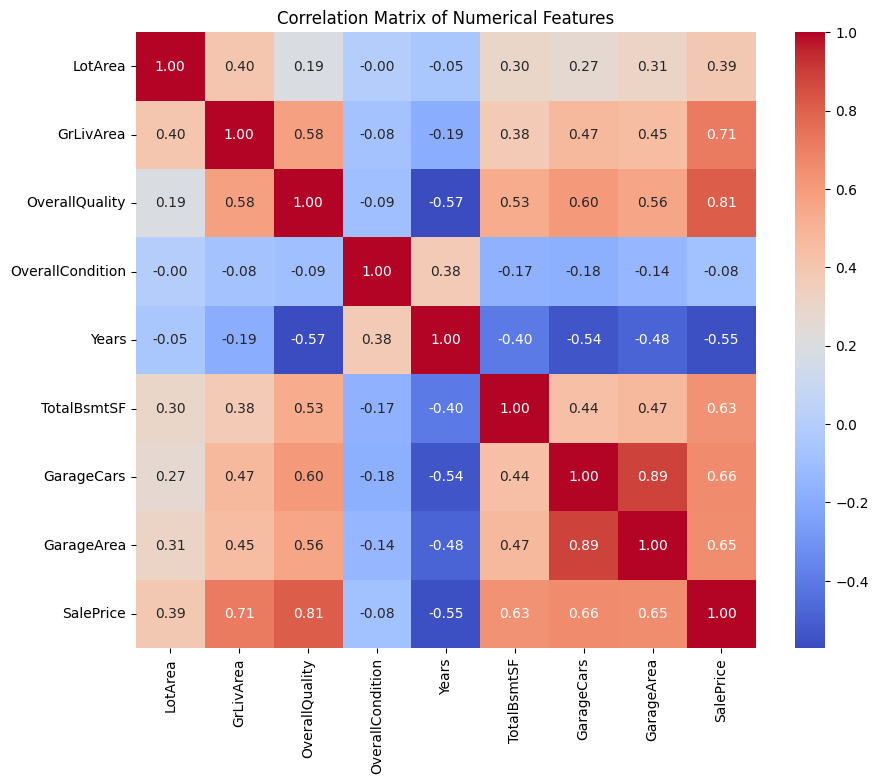

In [83]:
# Correlation matrix and heatmap
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df_clean[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Unique values in LotType: ['corner' 'inside' 'culdsac' 'fr2' 'fr3']
LotType
inside     1033
corner      257
culdsac      85
fr2          46
fr3           4
Name: count, dtype: int64


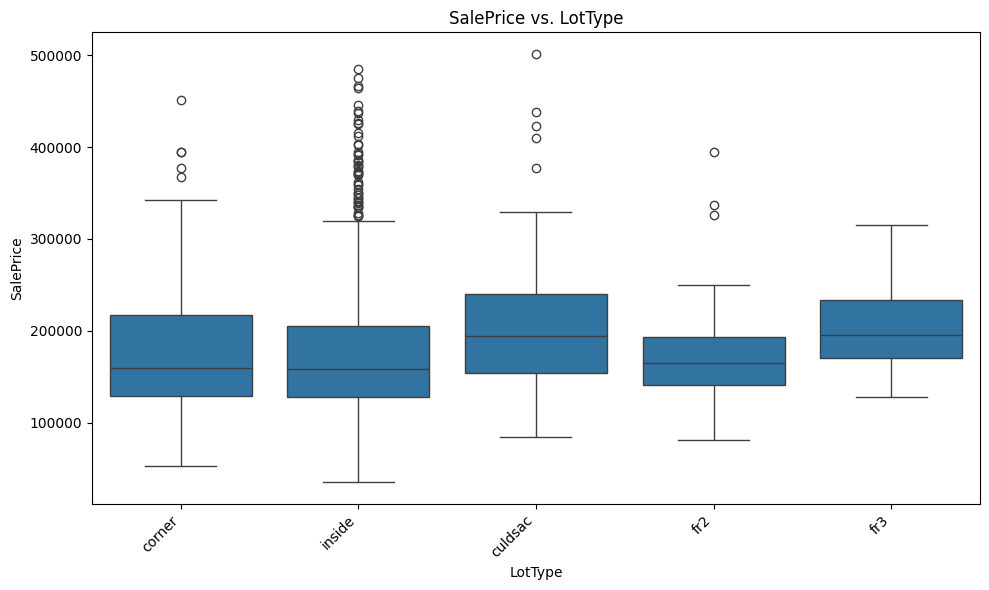

Unique values in BldgType: ['1fam' 'twnhs' 'duplex' '2fmcon' 'twnhse']
BldgType
1fam      1188
twnhse     114
duplex      52
twnhs       43
2fmcon      28
Name: count, dtype: int64


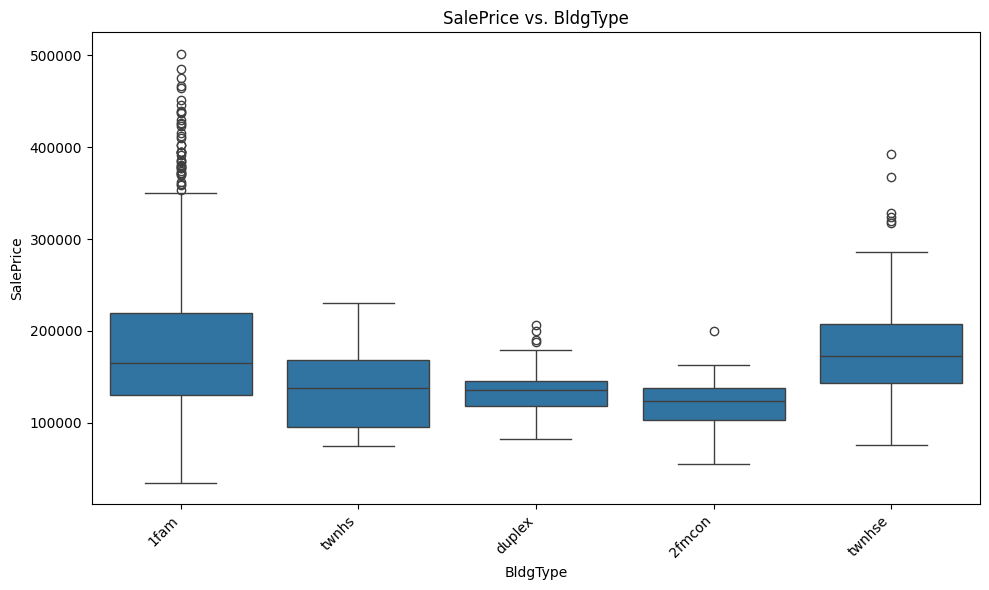

Unique values in HouseStyle: ['1fam' 'sfoyer' '2story' '1story' '2.5unf' '2.5fin' 'slvl' '1.5fin'
 '1.5unf']
HouseStyle
1story    707
2story    431
1.5fin    151
slvl       65
sfoyer     37
1.5unf     14
2.5unf     11
2.5fin      8
1fam        1
Name: count, dtype: int64


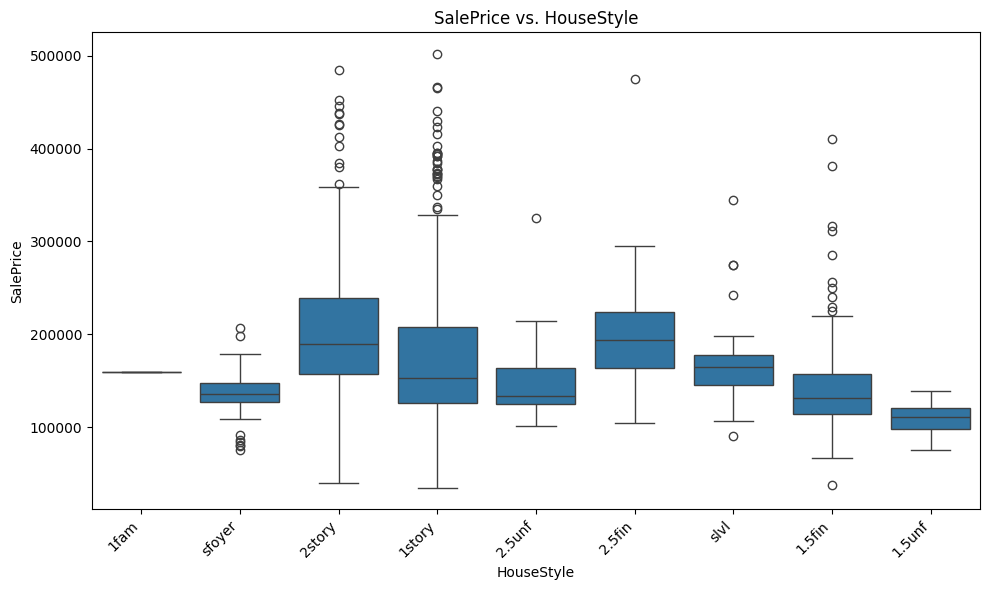

Unique values in CentralAir: ['y' 'n']
CentralAir
y    1331
n      94
Name: count, dtype: int64


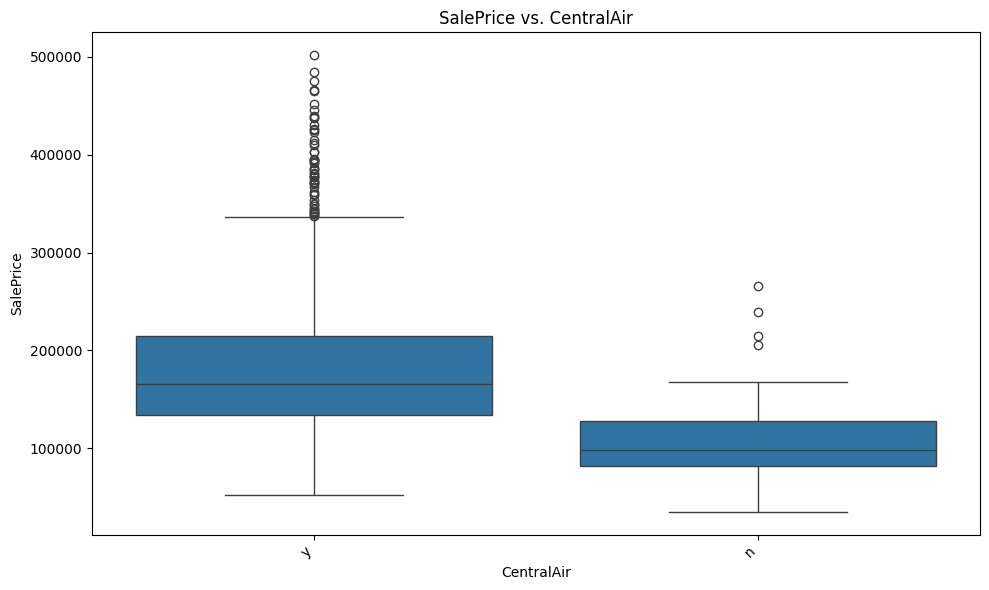

Unique values in SaleType: ['wd' 'cod' 'new' 'cwd' 'conli' 'conld' 'conlw' 'con' 'oth']
SaleType
wd       1237
new       117
cod        43
conld       9
conli       5
conlw       5
cwd         4
oth         3
con         2
Name: count, dtype: int64


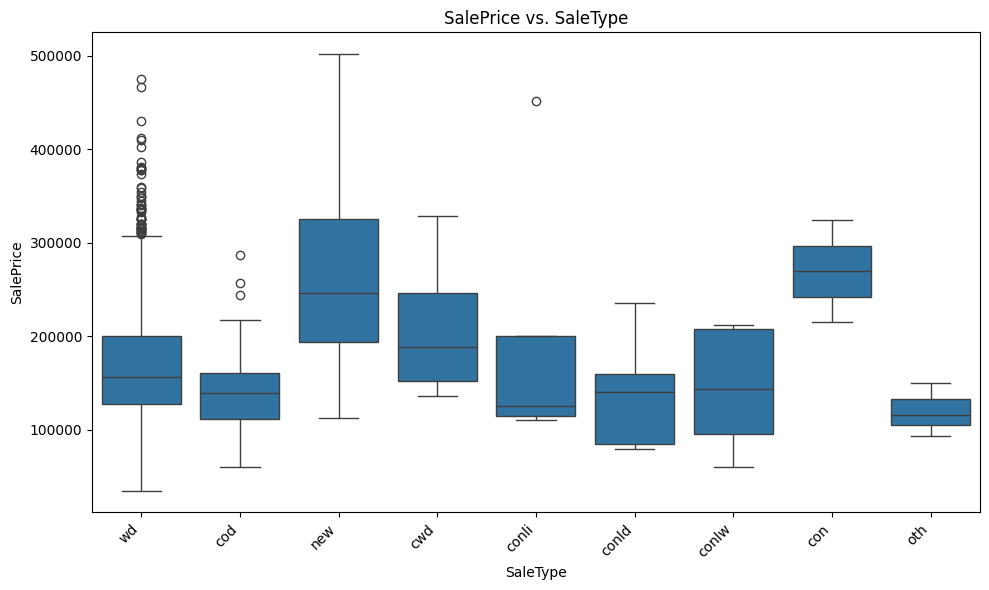

Unique values in SaleCondition: ['normal' 'adjland' 'abnorml' 'partial' 'family' 'alloca']
SaleCondition
normal     1171
partial     120
abnorml      99
family       20
alloca       11
adjland       4
Name: count, dtype: int64


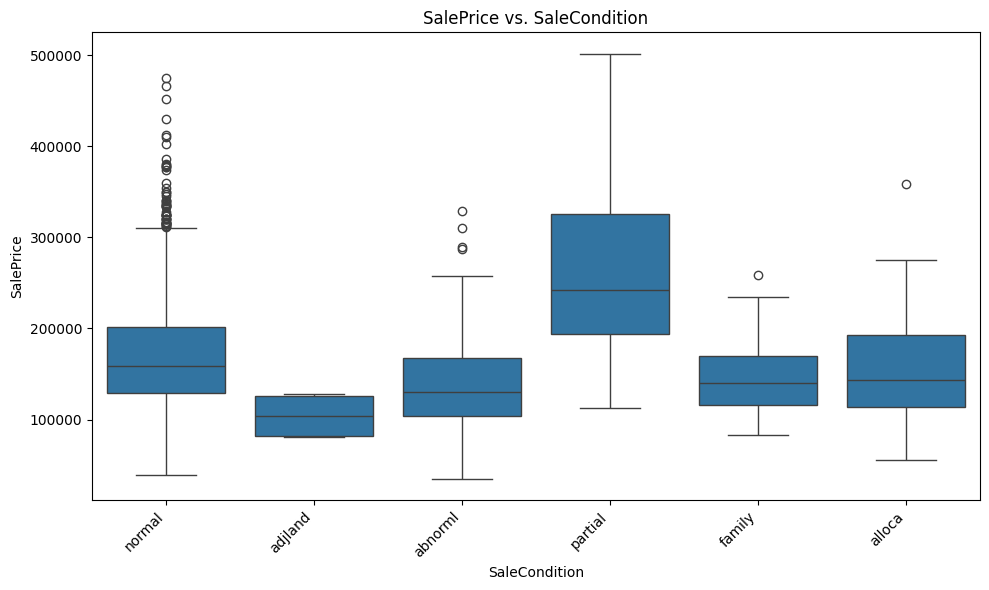

Summary of key findings will be added here.


In [76]:
# Analyze string features
string_cols = df_clean.select_dtypes(include=['object']).columns
for col in string_cols:
    print(f"Unique values in {col}: {df_clean[col].unique()}")
    print(df_clean[col].value_counts())
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='SalePrice', data=df_clean)
    plt.title(f'SalePrice vs. {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Summarize key findings (placeholder)
print("Summary of key findings will be added here.")

## 2. Feature Engineering (Encode): Create meaningful features from the dataset.
### Possible logic:

CulDSac (quiet) > Corner (larger exposure) > Inside (standard)

FR2 and FR3 are frontages on 2 or 3 sides — could indicate better exposure

In [86]:
lot_type_mapping = {
    'inside': 1,
    'corner': 2,
    'culdsac': 3,
    'fr2': 4,
    'fr3': 5
}
df_clean['LotType'] = df_clean['LotType'].map(lot_type_mapping)

In [87]:
df_clean.head()

,LotArea,GrLivArea,LotType,BldgType,HouseStyle,OverallQuality,OverallCondition,Years,TotalBsmtSF,CentralAir,GarageCars,GarageArea,SaleType,SaleCondition,SalePrice
0,8910,1194,2,1fam,1fam,6,6,66,655,y,2,539.0,wd,normal,159500
1,1526,630,1,twnhs,sfoyer,4,8,55,630,y,1,286.0,wd,normal,86000
2,14598,1933,3,1fam,2story,6,5,18,894,y,3,668.0,wd,normal,214000
3,7200,1040,1,duplex,1story,4,5,76,0,n,2,420.0,wd,normal,90000
4,5687,1716,1,2fmcon,2story,5,6,113,780,n,0,0.0,wd,normal,135900


BldgType: 1Fam, Twnhs, Duplex, 2fmCon, TwnhsE

In [88]:
bldg_type_mapping = {
    'twnhse': 1,
    'twnhs': 2,
    'duplex': 3,
    '2fmcon': 4,
    '1fam': 5
}
df_clean['BldgType'] = df_clean['BldgType'].map(bldg_type_mapping)

In [89]:
df_clean.head()

,LotArea,GrLivArea,LotType,BldgType,HouseStyle,OverallQuality,OverallCondition,Years,TotalBsmtSF,CentralAir,GarageCars,GarageArea,SaleType,SaleCondition,SalePrice
0,8910,1194,2,5,1fam,6,6,66,655,y,2,539.0,wd,normal,159500
1,1526,630,1,2,sfoyer,4,8,55,630,y,1,286.0,wd,normal,86000
2,14598,1933,3,5,2story,6,5,18,894,y,3,668.0,wd,normal,214000
3,7200,1040,1,3,1story,4,5,76,0,n,2,420.0,wd,normal,90000
4,5687,1716,1,4,2story,5,6,113,780,n,0,0.0,wd,normal,135900


In [90]:
house_style_mapping = {
    '1.5unf': 1,
    '1.5fin': 2,
    'sfoyer': 3,
    'slvl': 4,
    '1story': 5,
    '1fam': 6,
    '2story': 7,
    '2.5unf': 8,
    '2.5fin': 9
}
df_clean['HouseStyle'] = df_clean['HouseStyle'].map(house_style_mapping)

In [91]:
df_clean.head()

,LotArea,GrLivArea,LotType,BldgType,HouseStyle,OverallQuality,OverallCondition,Years,TotalBsmtSF,CentralAir,GarageCars,GarageArea,SaleType,SaleCondition,SalePrice
0,8910,1194,2,5,6,6,6,66,655,y,2,539.0,wd,normal,159500
1,1526,630,1,2,3,4,8,55,630,y,1,286.0,wd,normal,86000
2,14598,1933,3,5,7,6,5,18,894,y,3,668.0,wd,normal,214000
3,7200,1040,1,3,5,4,5,76,0,n,2,420.0,wd,normal,90000
4,5687,1716,1,4,7,5,6,113,780,n,0,0.0,wd,normal,135900


In [92]:
air_mapping = {
    'y': 1,
    'n': 0
}
df_clean['CentralAir'] = df_clean['CentralAir'].map(air_mapping)

In [93]:
df_clean.head()

,LotArea,GrLivArea,LotType,BldgType,HouseStyle,OverallQuality,OverallCondition,Years,TotalBsmtSF,CentralAir,GarageCars,GarageArea,SaleType,SaleCondition,SalePrice
0,8910,1194,2,5,6,6,6,66,655,1,2,539.0,wd,normal,159500
1,1526,630,1,2,3,4,8,55,630,1,1,286.0,wd,normal,86000
2,14598,1933,3,5,7,6,5,18,894,1,3,668.0,wd,normal,214000
3,7200,1040,1,3,5,4,5,76,0,0,2,420.0,wd,normal,90000
4,5687,1716,1,4,7,5,6,113,780,0,0,0.0,wd,normal,135900


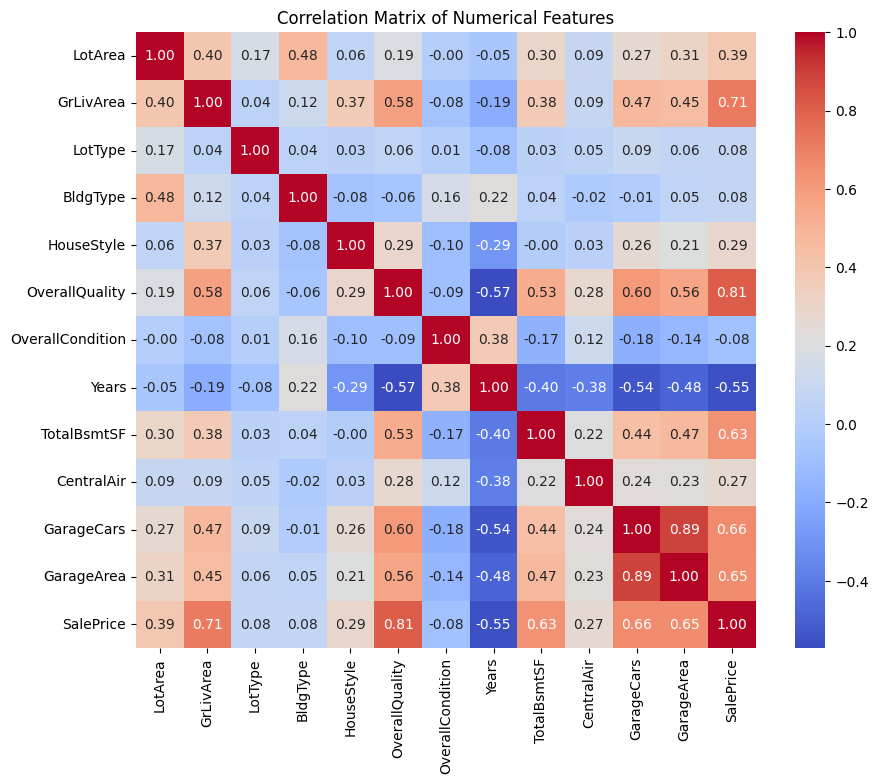

In [94]:
# Correlation matrix and heatmap
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df_clean[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

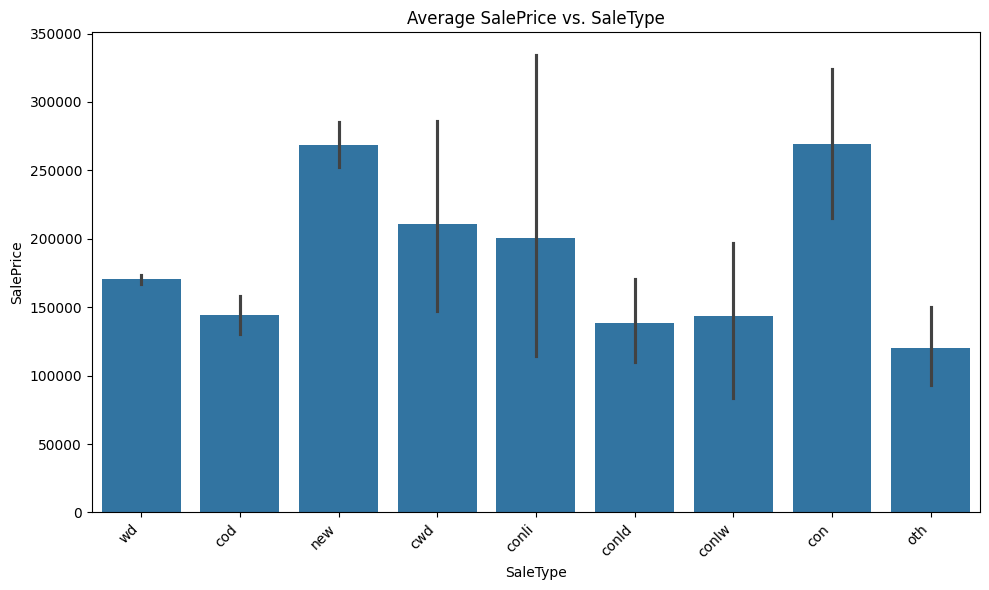

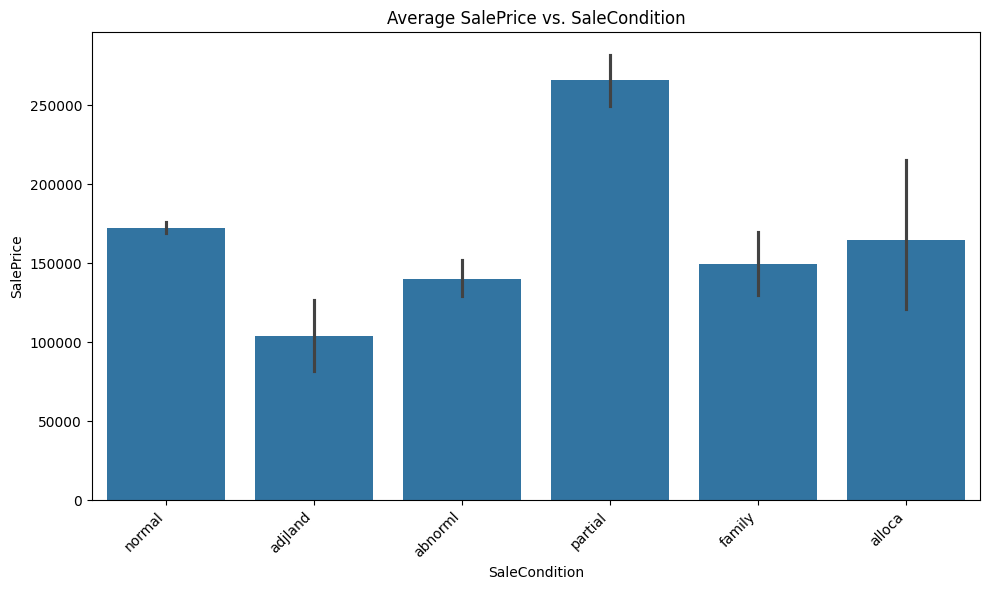

In [97]:
string_cols = df_clean.select_dtypes(include=['object']).columns

for col in string_cols:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=col, y='SalePrice', data=df_clean)
    plt.title(f'Average SalePrice vs. {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## 3. Modeling
Final model use linear regression
## 4. Evaluation:
Assess the performance of model using appropriate metrics.



In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Select the features and target variable
features = df_clean[['GrLivArea', 'OverallQuality', 'TotalBsmtSF', 'GarageCars']]
labels = df_clean['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=2)

# Create and train the linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Evaluate the model
score = reg.score(X_test, y_test)
print(f"R-squared score: {score}")

R-squared score: 0.8392350140793946


### Boosting regressor and set parameters
We create a variable where we define our gradient boosting regressor and set parameters to it , here
- n_estimator — The number of boosting stages to perform. We should not set it too high which would overfit our model.
- max_depth — The depth of the tree node.
- learning_rate — Rate of learning the data.
- loss — loss function to be optimized. ‘ls’ refers to least squares regression
- minimum sample split — Number of sample to be split for learning the data

In [133]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1,  loss='squared_error')

In [123]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [124]:
clf.score(X_test, y_test)

0.8636363092928216

## Summary:
### Data Preprocessing and Feature Engineering:
1. **Data Cleaning:** You handled missing values in 'GarageArea' based on the average area per car. You also cleaned outliers in 'LotArea', 'GrLivArea', and 'SalePrice' using the IQR method. Unnecessary columns ('YearSold', 'YearBuilt', 'FullBath', 'HalfBath', 'Foundation') were removed.
2. **Feature Encoding:** You converted categorical features to numerical representations using ordinal encoding techniques. For example:
- LotType: 'inside' (1), 'corner' (2), 'culdsac' (3), 'fr2' (4), 'fr3' (5)

### Modeling and Evaluation:

1. Linear Regression: I trained a linear regression model using 'GrLivArea', 'OverallQuality', 'TotalBsmtSF', and 'GarageCars' as features to predict 'SalePrice'. The model achieved an R-squared score of 0.8392, indicating a good fit to the data.
2. Gradient Boosting Regressor: I explored using a Gradient Boosting Regressor and encountered some issues with the loss parameter and accessing the loss function. After resolving these issues, I could potentially further evaluate the performance of this model.


### Model Improvement:
While the linear regression model shows good performance, you could explore further techniques to potentially improve it:
- Feature Engineering: Create new features or interactions between existing features.
- Hyperparameter Tuning: Optimize the model's parameters to find the best settings.
